In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
fn_src = 'https://www.dropbox.com/sh/n4924ipcfjqc0t6/AADOv9JYMUBK1tlg9P71gSSra/example_data_s1.pickle?dl=1'
fn_dst = 'example_data_s1.pickle'
import os
from six.moves import urllib
if os.path.isfile(fn_dst):
  print('File %s is already downloaded' % fn_dst)
else:
  urllib.request.urlretrieve(fn_src, fn_dst)

In [3]:
with open('example_data_s1.pickle', 'rb') as fp:
  X,y = pickle.load(fp)

In [4]:
tsamp = 0.05 # sampling time in seconds
# TODO 1
nt = X.shape[0]
nneuron = X.shape[1]
nout = y.shape[1]
ttotal = tsamp * nt
print("nt:{},nneuron:{},nout:{},ttotal:{}".format(nt,nneuron,nout,ttotal))

nt:61339,nneuron:52,nout:2,ttotal:3066.9500000000003


In [5]:
from sklearn.model_selection import train_test_split
# TODO 2
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.33)

In [6]:
# TODO 3
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(Xtr,ytr)
yhat = regr.predict(Xts)

ym = np.mean(yts)
MSE = np.mean((yts-yhat)**2)
syy = np.mean((yts-ym)**2)
rsq = 1 - MSE/syy
print("rsq:{}".format(rsq))

rsq:0.46799137387487355


Text(0, 0.5, 'Predicted value')

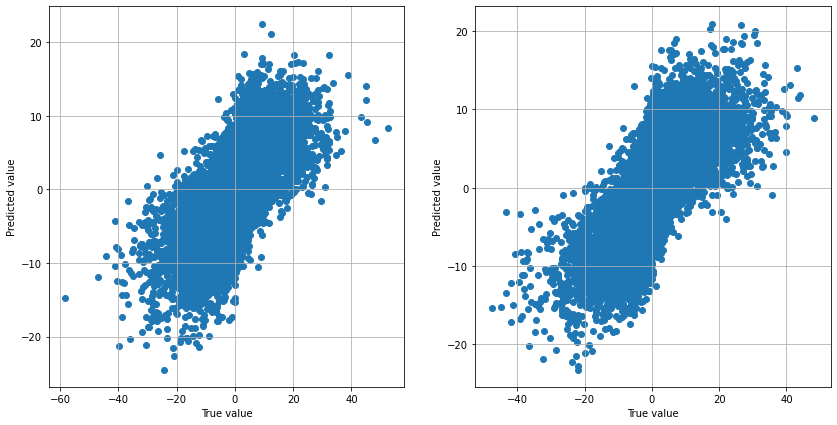

In [7]:
# TODO 4
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,7))

plot1.scatter(yts[:,0],yhat[:,0])

plot2.scatter(yts[:,1],yhat[:,1])

plot1.grid()
plot1.set_xlabel('True value')
plot1.set_ylabel('Predicted value')

plot2.grid()
plot2.set_xlabel('True value')
plot2.set_ylabel('Predicted value')


In [8]:
def create_dly_data(X,y,dly):
  # TODO 5
  n = X.shape[0]
  p = X.shape[1]
  Xdly = np.zeros((n-dly,(dly+1)*p))
  ydly = np.zeros((n-dly,2))
  for i in range(0,n-dly):
    temp = X[i]
    for j in range(1,dly+1):
      temp = np.hstack((temp,X[i+j]))
    Xdly[i] = temp

  for i in range(0,n-dly):
    ydly[i] = y[i+dly]

  return Xdly, ydly

In [9]:
# TODO 6
Xdly,ydly = create_dly_data(X,y,dly=6)

Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly, ydly, test_size=0.33)
regr2 = linear_model.LinearRegression()
regr2.fit(Xtr2,ytr2)
yhat2 = regr2.predict(Xts2)

ym2 = np.mean(yts2)
MSE2 = np.mean((yts2-yhat2)**2)
syy2 = np.mean((yts2-ym2)**2)
rsq2 = 1 - MSE2/syy2
print("rsq:{}".format(rsq2))

rsq:0.6929898975996198


Text(0, 0.5, 'Predicted value')

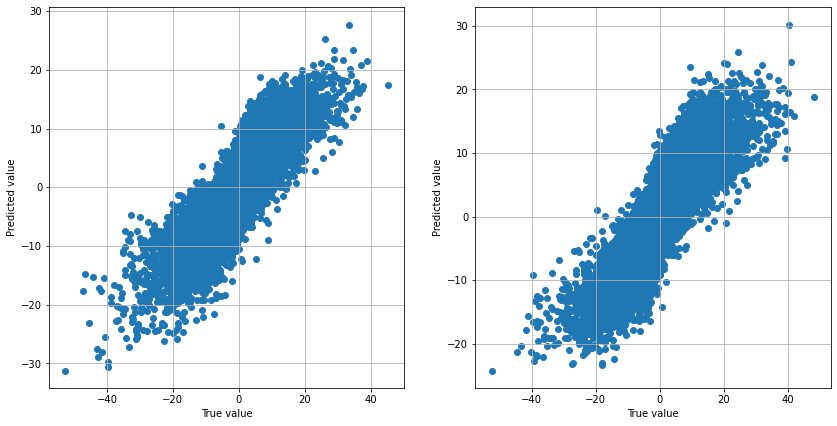

In [10]:
# TODO 7
fig, (plot3, plot4) = plt.subplots(1, 2, figsize=(14,7))

plot3.scatter(yts2[:,0],yhat2[:,0])

plot4.scatter(yts2[:,1],yhat2[:,1])

plot3.grid()
plot3.set_xlabel('True value')
plot3.set_ylabel('Predicted value')

plot4.grid()
plot4.set_xlabel('True value')
plot4.set_ylabel('Predicted value')


In [11]:
nred = 6000
# TODO 8
Xred = np.zeros((6000,nneuron))
yred = np.zeros((6000,2))
for i in range(6000):
  Xred[i] = X[i]
  yred[i] = y[i]


In [12]:
import  sklearn.model_selection 
import tqdm.notebook

nfold = 5  # Number of folds
dmax = 15  # maximum number of delays

# TODO 9:  Create a k-fold object
kf = sklearn.model_selection.KFold(n_splits=nfold, shuffle=True)

# TODO 10:  Model orders to be tested
dtest = np.arange(0,dmax)
nd = len(dtest)

# TODO 11.  
# Initialize a matrix Rsq to hold values of the R^2 across the model orders and folds.
# Alternatively, you can also create an RSS matrix
Rsq_ts = np.zeros((nd,nfold))

# Create a progress bar.  Note there are nd*nfold total fits.
pbar = tqdm.notebook.tqdm(
    total=nfold*nd, initial=0,
    unit='fits', unit_divisor=nd, desc='Model order test')


for it, d in enumerate(dtest):
  # TODO 12:  
  # Create the delayed data using the create_dly_function from the reduced
  # data Xred, yred
  Xdly2, ydly2 = create_dly_data(Xred,yred,d)    

  # Loop over the folds
  for isplit, Ind in enumerate(kf.split(Xdly2)):
    # Get the training data in the split
    Itr, Its = Ind        

    # TODO 13
    # Split the data (Xdly2,ydly2) into training and test

    Xtr3 = Xdly2[Itr]
    ytr3 = ydly2[Itr]
    Xts3 = Xdly2[Its]
    yts3 = ydly2[Its]
        
    # TODO 14:  Fit data on training data        
    regr3 = linear_model.LinearRegression()
    regr3.fit(Xtr3,ytr3)
    yhat3 = regr3.predict(Xts3)
        
    # TODO 15:  Measure the R^2 vale on test data and store in the matrix Rsq
    ym3 = np.mean(yts3)
    MSE3 = np.mean((yts3-yhat3)**2)
    syy3 = np.mean((yts3-ym3)**2)
    Rsq_ts[it,isplit] = 1 - MSE3/syy3

    pbar.update(1)
pbar.close() 

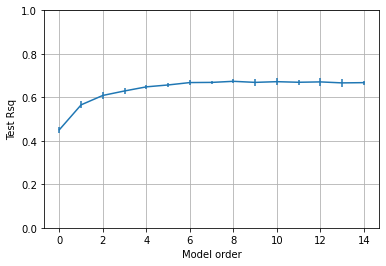

In [13]:
# TODO 16
Rsq_mean = np.mean(Rsq_ts,axis=1)
Rsq_std  = np.std(Rsq_ts,axis=1)*np.sqrt(nfold)/np.sqrt(nfold-1)
plt.errorbar(dtest, Rsq_mean, yerr=Rsq_std, fmt='-')
plt.ylim(0,1)
plt.xlabel('Model order')
plt.ylabel('Test Rsq')
plt.grid()

In [14]:
# TODO 17
imax = np.argmax(Rsq_mean)
print("The selected model order is {0:d}".format(dtest[imax]))

The selected model order is 8


In [15]:
# TODO 18
imin = np.argmin(Rsq_mean)
Rsq_tgt = Rsq_mean[imin] + Rsq_std[imin]
I = np.where(Rsq_mean >= Rsq_tgt)[0]
iopt = I[0]
dopt = dtest[iopt]

print("The estimated model order is %d" % dopt)

The estimated model order is 1
